# Big Mart Sales Analysis

In today’s world, Data Science finds a huge application in the field of Market analysis. Be it 
sales prices or the volatility of a crypto currency, prediction is the one thing that holds a
position of paramount importance in the field of marketing and trading. In this brief project, 
we have downloaded a very popular dataset – Big Mart Sales from Kaggle and have tried to 
fit an appropriate Machine Learning model that can provide us with an estimated price given 
several features about the item. 

The model with the best R2 fit and the least Mean Squared Error is picked to be the one that 
will be applied to the dataset. We then tune the hyperparameters a little and come up with 
a working application ready model. 

### Importing necessary libraries

In [15]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import r2_score

### Loading in the dataset

The dataset consist of 12 columns as can be seen in the notebook ahead. 

In [8]:
train = pd.read_csv("train.csv")

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Splitting the dataset into test and train

We now split the dataset into training and test set respectively in the ratio 70:30.

In [9]:
train_trim = train.drop(columns = ["Item_Identifier"])

X = train_trim.drop(columns = ["Item_Outlet_Sales"])
y = train.Item_Outlet_Sales

### Data Preprocessing

The dataset as can be seen contains some categorical and numerical columns. Imputing the missing values in the numerical columns and encoding the categorical columns becomes necessary to make the data into machine readable format. We will employ the concept of pipelining to achieve the following two tasks.

The Exploratory Data Analysis for the task has been done and shown in the project in a seperate folder. I have used R for the data visualization task. Interested people can refer to this in the folder 'EDA' provided seperately in the repository.

In [10]:
#Segregate the columns into numerical and categorical respectively
num_cols = [i for i in X.columns if X[i].dtype in ['int64', 'float64']]
categorical_cols = [i for i in X.columns if X[i].dtype == 'object']

#Make pipelines for processing numerical and categorical columns alike
numerical_transformer = Pipeline(steps = [
 ('imputer', SimpleImputer(strategy = 'median')),
 ('normalizer', StandardScaler())
 ])

categorical_transformer = Pipeline(steps = [
 ('imputer', SimpleImputer(strategy = 'most_frequent')),
 ('one-hot', OneHotEncoder(handle_unknown = 'ignore'))
 ])

#Finally, combine them into a single instance of ColumnTransformer
preprocessor = ColumnTransformer(
 transformers = [
 ('num', numerical_transformer, num_cols),
 ('cat', categorical_transformer, categorical_cols)
 ])

# Model fitting and evaluation

### Random Forest

Random forest is a Supervised Machine Learning Algorithm that is used 
widely in Classification and Regression problems. It builds decision trees 
on different samples and takes their majority vote for classification and 
average in case of regression. One of the most important features of the 
Random Forest Algorithm is that it can handle the data set 
containing continuous variables as in the case of regression 
and categorical variables as in the case of classification. It performs better 
in case of classification problems.

The model we have employed here will consist of 2000 weak learners (given by the hyperparameter n_estimator). 

In [11]:
model_rf = RandomForestRegressor(n_estimators = 2000)
reg_rf = Pipeline(steps = [('preprocesor', preprocessor),
 ('model', model_rf)
 ])

reg_rf.fit(X_train, y_train)
pred_rf = reg_rf.predict(X_valid)

### Extreme Gradient Boosting (XGBoost)

Gradient boosting refers to a class of ensemble machine learning 
algorithms that can be used for classification or regression predictive 
modelling problems.
Ensembles are constructed from decision tree models. Trees are added 
one at a time to the ensemble and fit to correct the prediction errors made 
by prior models. This is a type of ensemble machine learning model 
referred to as boosting.

We have taken the number of weak learners to be 2000 in this case with a learning rate of 0.0015625. The hyper parameter tuning was done by iterating over a range of values for our learning rate and taking the one which gave the least error or the best accuracy as the decided learning_rate.

In [12]:
model_xgb = XGBRegressor(n_estimators = 2000, learning_rate = 0.0015625)
reg_xgb = Pipeline(steps = [('preprocessor', preprocessor),
 ('model_xgb', model_xgb)
 ]
 )
reg_xgb.fit(X_train, y_train)
pred_xgb = reg_xgb.predict(X_valid)

Choosing the best value for n_estimator

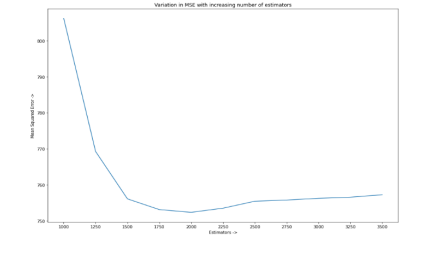

Choosing the best value for learning_rate

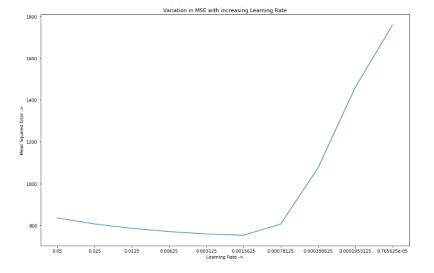

### Support Vector Machines

Support Vector Machine or we can say SVM is one of the most 
popular Supervised Learning algorithms, which is basically used for 
Classification as well as Regression problems. However, mainly, it is used 
for Classification problems in Machine Learning.
The main goal of the SVM algorithm is to create the best line or decision 
boundary that can divide n-dimensional space into classes so that we can 
easily put the new data point in the correct category in the future. This best 
decision boundary is called a hyperplane.
SVM chooses the most extreme points/vectors that does helps in creating 
the hyperplane. These extreme cases are called/known to be support 
vectors, and hence algorithm is termed as Support Vector Machine.
We have used two kernels here in our project – <b>
    
    • Radial Basis Function - Radial Basis Kernel is a kernel function 
    that is used in machine learning to find a non-linear classifier or 
    regression line.
    
    • Linear - Linear Kernel is used when the data is Linearly separable, 
    that is, it can be separated using a single Line. It is one of the most 
    common kernels to be used. It is mostly used when there are a 
    large number of Features in a particular Data Set.

In [13]:
#Linear kernel
model_svm = SVR(kernel = 'linear', gamma = 'scale')
reg_svm_linear = Pipeline(steps = [('preprocessor', preprocessor),
 ('model_svm', model_svm)
 ])
reg_svm_linear.fit(X_train, y_train)
pred_svml = reg_svm_linear.predict(X_valid)

#RBF kernel
model_svmr = SVR(kernel = 'rbf', gamma = 'scale')
reg_svm_rbf = Pipeline(steps = [('preprocessor', preprocessor),
 ('model_svmr', model_svmr)
 ])
reg_svm_rbf.fit(X_train, y_train)
pred_svmr = reg_svm_rbf.predict(X_valid)

Now, we will compare which of our model performed best. Mean Squared Error is taken as the metric for comparison here.

<BarContainer object of 4 artists>

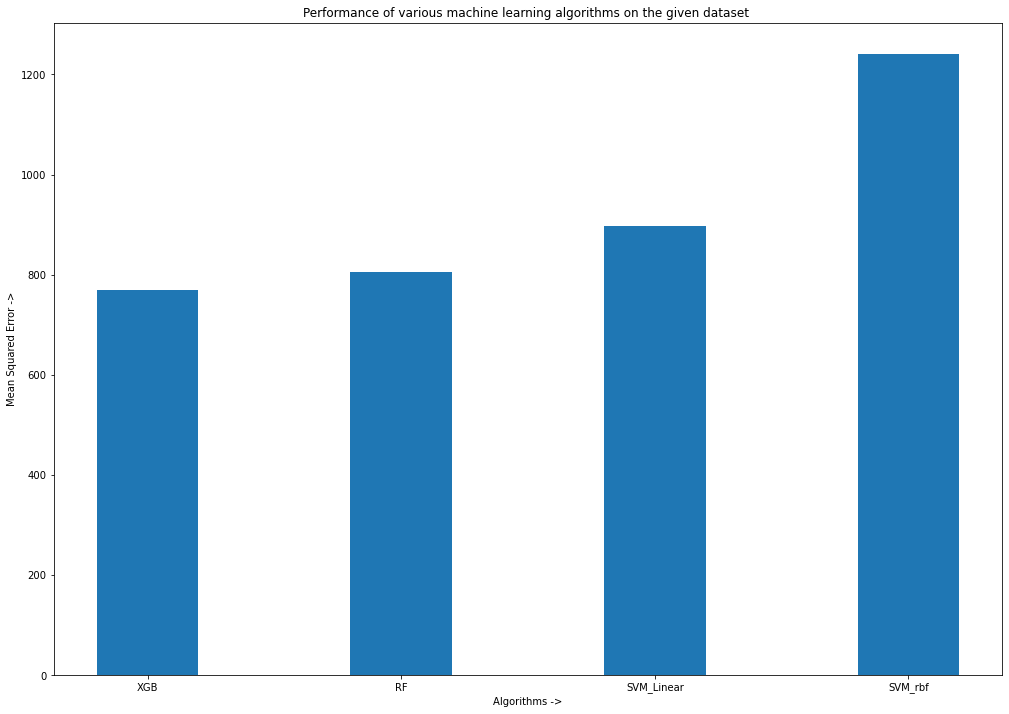

In [14]:
#Stre all the values in a dictionary
dic = {
 "XGB" : mean_absolute_error(y_valid, pred_xgb),
 "RF" : mean_absolute_error(y_valid, pred_rf),
 "SVM_Linear" : mean_absolute_error(y_valid, pred_svml),
 "SVM_rbf" : mean_absolute_error(y_valid, pred_svmr)
 }

#Bar plot to compare the performance
plt.figure(figsize = (17,12))
plt.title("Performance of various machine learning algorithms on the given dataset ")
plt.xlabel("Algorithms ->")
plt.ylabel("Mean Squared Error ->")
plt.bar(dic.keys(), dic.values(), width = 0.4)

Let's compare the R2 score of each model with each other

<BarContainer object of 4 artists>

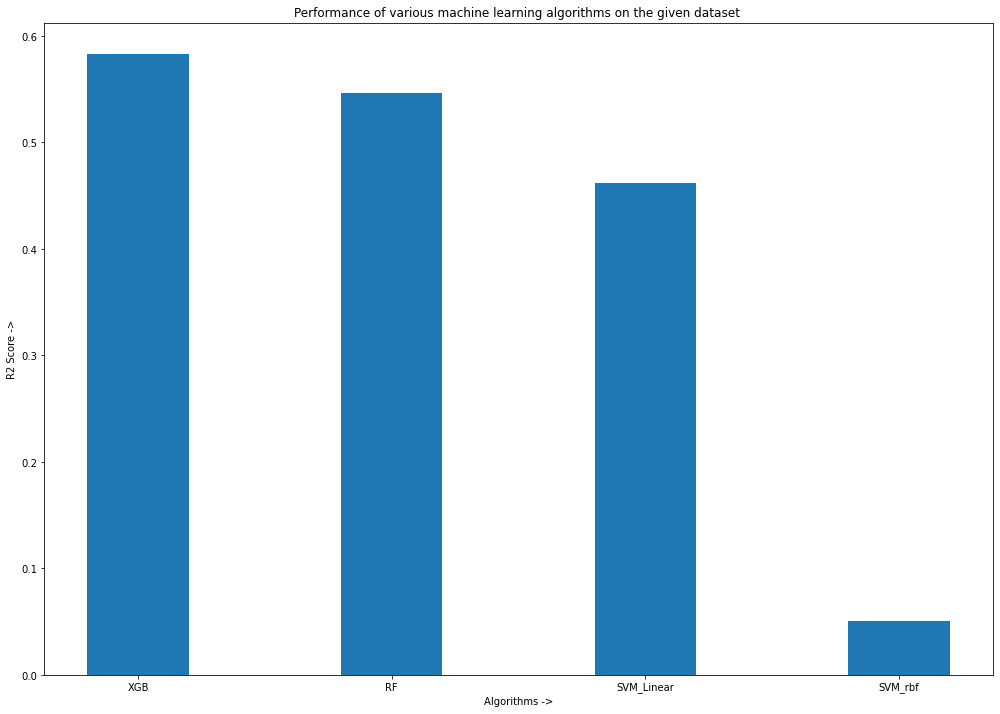

In [17]:
#Stre all the values in a dictionary
dic = {
 "XGB" : r2_score(y_valid, pred_xgb),
 "RF" : r2_score(y_valid, pred_rf),
 "SVM_Linear" : r2_score(y_valid, pred_svml),
 "SVM_rbf" : r2_score(y_valid, pred_svmr)
 }

#Bar plot to compare the performance
plt.figure(figsize = (17,12))
plt.title("Performance of various machine learning algorithms on the given dataset ")
plt.xlabel("Algorithms ->")
plt.ylabel("R2 Score ->")
plt.bar(dic.keys(), dic.values(), width = 0.4)

# Conclusion

We see that the XGBoost Regressor performed best on our dataset, with the lowest Mean Squared error of around 800. Not surprisingly, it had the highest R2 score too, indicating that it fit our model the best. 